<a href="https://colab.research.google.com/github/PranithPAlva/Datascience/blob/main/GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Gpu Problem*


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1=pd.read_csv("/content/sgemm_product.csv")
df = df1.sample(frac=0.4)
df.shape

(96640, 18)

In [ ]:
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
137656,64,128,32,16,32,16,16,2,1,2,1,0,0,0,44.40,44.41,44.39,44.32,44.380
18869,16,128,32,16,32,16,32,2,1,2,0,1,0,1,49.44,49.43,49.50,49.69,49.515
19800,32,16,16,8,16,16,16,2,2,1,1,0,0,0,76.51,76.50,76.43,76.46,76.475
134639,64,128,32,16,8,32,32,2,1,1,1,1,1,1,102.70,102.74,102.71,102.71,102.715
11839,16,128,16,8,8,8,32,8,2,4,1,1,1,1,33.11,33.11,33.04,33.12,33.095


In [ ]:
df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96640 entries, 137656 to 105609
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MWG      96640 non-null  int64  
 1   NWG      96640 non-null  int64  
 2   KWG      96640 non-null  int64  
 3   MDIMC    96640 non-null  int64  
 4   NDIMC    96640 non-null  int64  
 5   MDIMA    96640 non-null  int64  
 6   NDIMB    96640 non-null  int64  
 7   KWI      96640 non-null  int64  
 8   VWM      96640 non-null  int64  
 9   VWN      96640 non-null  int64  
 10  STRM     96640 non-null  int64  
 11  STRN     96640 non-null  int64  
 12  SA       96640 non-null  int64  
 13  SB       96640 non-null  int64  
 14  Runtime  96640 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 11.8 MB


In [ ]:
df1.isnull().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

In [ ]:
Q1=df1['Runtime'].quantile(0.25)
Q2=df1['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LL=Q1-1.5*IQR
UL=Q2+1.5*IQR
df2 = df1[(df1.Runtime>LL) & (df1.Runtime<UL)]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,85884.0,75.671557,41.975402,16.00,32.000000,64.00000,128.00,128.000
NWG,85884.0,75.785385,41.975304,16.00,32.000000,64.00000,128.00,128.000
KWG,85884.0,25.603838,7.837628,16.00,16.000000,32.00000,32.00,32.000
MDIMC,85884.0,14.513344,8.138760,8.00,8.000000,16.00000,16.00,32.000
NDIMC,85884.0,14.474873,8.118386,8.00,8.000000,16.00000,16.00,32.000
MDIMA,85884.0,17.378511,9.371763,8.00,8.000000,16.00000,32.00,32.000
NDIMB,85884.0,17.380560,9.389416,8.00,8.000000,16.00000,32.00,32.000
KWI,85884.0,5.014042,2.999985,2.00,2.000000,8.00000,8.00,8.000
VWM,85884.0,2.334544,1.854304,1.00,1.000000,2.00000,4.00,8.000
VWN,85884.0,2.342206,1.864713,1.00,1.000000,2.00000,4.00,8.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


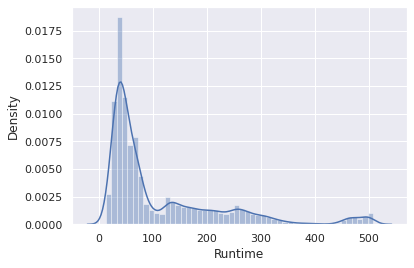

In [ ]:
df2['target']=np.log(df2.Runtime)
sns.distplot(df2['Runtime'])

Text(0.5, 1.0, 'Variable Correlation')

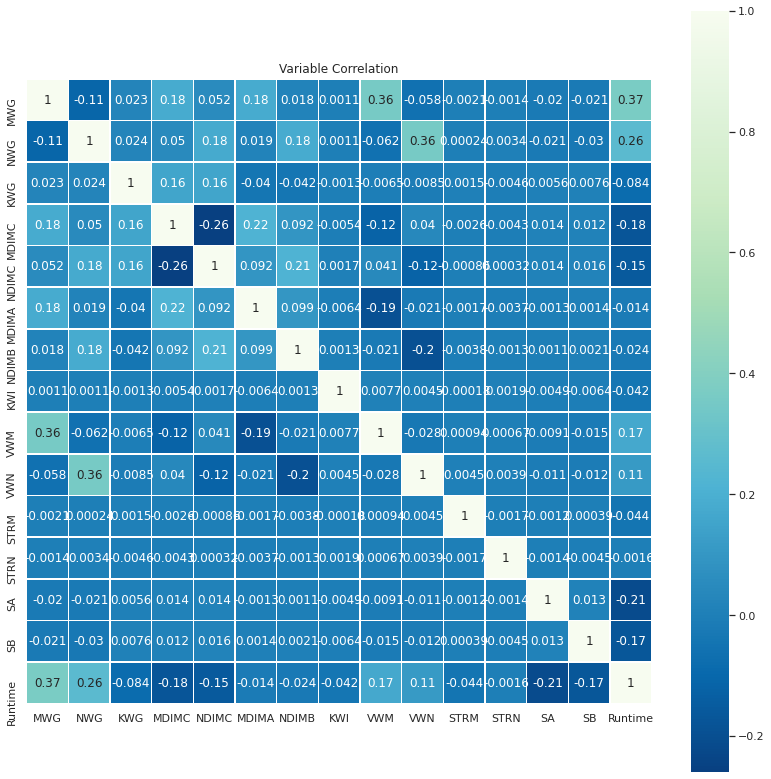

In [ ]:
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(df2.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')


In [ ]:
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
df_features=df2.drop(columns=['target','Runtime'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [ ]:
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

Linear Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

After 5 fold cross validation:
Mean of Accuracies:  84.92630696908326
Standard deviation of Accuracies 0.14440363975959117


In [ ]:
y_predl = lsvclassifier.predict(x1_test)

In [ ]:
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Test Output:
Confusion Matrix:
[[14153  1552]
 [ 2323  7738]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     15705
         1.0       0.83      0.77      0.80     10061

    accuracy                           0.85     25766
   macro avg       0.85      0.84      0.84     25766
weighted avg       0.85      0.85      0.85     25766

Accuracy:  0.8496080105565473


#Plot

Text(0, 0.5, 'predictions')

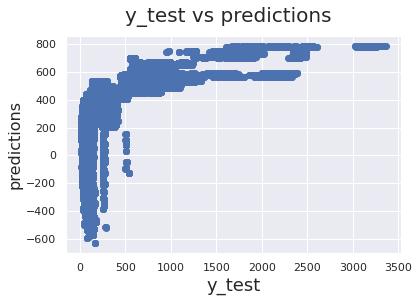

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(y_test,predictions)
fig.suptitle('y_test vs predictions', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('predictions', fontsize=16) 